# Sympy - Symbolic algebra in Python

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *

To get nice-looking $\LaTeX$ formatted output run:

In [3]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

## Symbolic variables

In [4]:
x = Symbol('x')

In [5]:
(pi + x)**2

In [6]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

We can add assumptions to symbols when we create them:

In [8]:
x = Symbol('x', real=True)

In [9]:
x.is_imaginary

False

In [10]:
x = Symbol('x', positive=True)

In [11]:
x > 0

True

The imaginary unit is denoted `I` in Sympy. 

In [12]:
1+1*I

In [13]:
I**2

In [14]:
(x * I + 1)**2

### Rational numbers
There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`: 

In [19]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [20]:
r1

In [21]:
r1+r2

In [22]:
r1/r2

## Numerical evaluation
SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [ ]:
pi.evalf(n=50)

In [25]:
x = Symbol('x')
y = (x + pi)**2

In [31]:
N(y, 5) # same as evalf

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [32]:
y.subs(x, 1.5)

In [34]:
N(y.subs(x, 1.5), n=4)

The `subs` function can of course also be used to substitute Symbols and expressions:

In [35]:
y.subs(x, a+pi)

We can also combine numerical evolution of expressions with NumPy arrays:

In [36]:
import numpy

In [38]:
x_vec = numpy.arange(0, 10, 0.1)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


In [40]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

[9.86960440108936 10.5079229318073 11.1662414625253 11.8445599932432
 12.5428785239612 13.2611970546792 13.9995155853971 14.7578341161151
 15.5361526468330 16.3344711775510 17.1527897082689 17.9911082389869
 18.8494267697049 19.7277453004228 20.6260638311408 21.5443823618587
 22.4827008925767 23.4410194232947 24.4193379540126 25.4176564847306
 26.4359750154485 27.4742935461665 28.5326120768845 29.6109306076024
 30.7092491383204 31.8275676690383 32.9658861997563 34.1242047304742
 35.3025232611922 36.5008417919102 37.7191603226281 38.9574788533461
 40.2157973840640 41.4941159147820 42.7924344455000 44.1107529762179
 45.4490715069359 46.8073900376538 48.1857085683718 49.5840270990898
 51.0023456298077 52.4406641605257 53.8989826912436 55.3773012219616
 56.8756197526795 58.3939382833975 59.9322568141155 61.4905753448334
 63.0688938755514 64.6672124062693 66.2855309369873 67.9238494677053
 69.5821679984232 71.2604865291412 72.9588050598591 74.6771235905771
 76.4154421212951 78.1737606520130

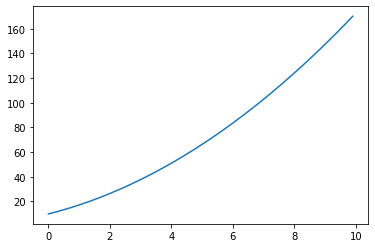

In [41]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

However, this kind of numerical evolution can be very slow, and there is a much more efficient way to do it: Use the function `lambdify` to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [42]:
f = lambdify([x], (x + pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [43]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [44]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

100 loops, best of 5: 18.8 ms per loop


In [45]:
%%timeit

y_vec = f(x_vec)

The slowest run took 15.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.23 µs per loop


## Algebraic manipulations

### Expand and factor
The first steps in an algebraic manipulation 

In [46]:
(x+1)*(x+2)*(x+3)

In [47]:
expand((x+1)*(x+2)*(x+3))

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

In [48]:
sin(a+b)

In [49]:
expand(sin(a+b), trig=True)

The opposite a product expansion is of course factoring. The factor an expression in SymPy use the `factor` function: 

In [50]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify
The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [51]:
# simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [52]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

In [53]:
simplify(cos(x)/sin(x))

### apart and together
To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [54]:
f1 = 1/((a+1)*(a+2))

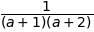

In [55]:
f1

In [56]:
apart(f1)

In [57]:
f2 = 1/(a+2) + 1/(a+3)

In [58]:
f2

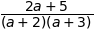

In [60]:
together(f2)

## Calculus

### Differentiation

In [75]:
x

In [76]:
diff(x**2, x)

For higher order derivatives we can do:

In [77]:
diff(x**2, x, x)

In [78]:
diff(x**2, x, 2) # same as above

To calculate the derivative of a multivariate expression, we can do:

In [79]:
x, y, z = symbols("x,y,z")

In [80]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [81]:
diff(f, x, 1, y, 2)

## Integration

In [82]:
f

In [83]:
integrate(f, x)

             ⎛⎧-cos(x⋅y)            ⎞
             ⎜⎪──────────  for y ≠ 0⎟
x⋅cos(y⋅z) + ⎜⎨    y                ⎟
             ⎜⎪                     ⎟
             ⎝⎩    0       otherwise⎠

By providing limits for the integration variable we can evaluate definite integrals:

In [84]:
integrate(f, (x, -1, 1))

In [85]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

In [87]:
n = Symbol("n")

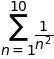

In [88]:
Sum(1/n**2, (n, 1, 10))

In [90]:
Sum(1/n**2, (n,1, 10)).evalf(n=5)

In [91]:
Sum(1/n**2, (n, 1, oo)).evalf()

In [93]:
Product(n, (n, 1, 10)) # 10!

## Linear algebra

### Matrices

Matrices are defined using the `Matrix` class:

In [94]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [95]:
A = Matrix([[m11, m12],[m21, m22]])
A

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [96]:
b = Matrix([[b1], [b2]])
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

With `Matrix` class instances we can do the usual matrix algebra operations:

In [99]:
A**2

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [100]:
A * b

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

And calculate determinants and inverses, and the like:

In [101]:
A.det()

In [102]:
A.inv()

⎡       m₂₂               -m₁₂       ⎤
⎢─────────────────  ─────────────────⎥
⎢m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎥
⎢                                    ⎥
⎢      -m₂₁                m₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎦

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [103]:
solve(x**2 - 1, x)

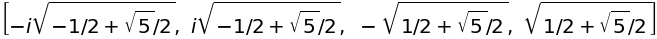

In [116]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [117]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

In [123]:
a, c = symbols("a, c")
solve([x + y - a, x - y - c], [x,y])

In [142]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol

x1 = Symbol('x1')
x2 = Symbol('x2')

f1 = 3*x1 - x2 + 10
f2 = 4*x2 + x1 + 5

ret = solve((f1,f2), dict=True)
#print(ret[0])
ret[0][x1]

## Further reading
* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.